# Task 1: Exploratory Data Analysis (EDA) and Business Insights

#### 1. Customers.csv:
   
 CustomerID: Unique identifier for each customer.

 CustomerName: Name of the customer.
 
 Region: Continent where the customer resides.
 
 SignupDate: Date when the customer signed up.
 
#### 2. Products.csv
   
 ProductID: Unique identifier for each product.
 
 ProductName: Name of the product.
 
 Category: Product category.
 
 Price: Product price in USD.
 
#### 3. Transactions.csv
   
 TransactionID: Unique identifier for each transaction.

 CustomerID: ID of the customer who made the transaction.
 
 ProductID: ID of the product sold.
 
 TransactionDate: Date of the transaction.
 
 Quantity: Quantity of the product purchased.
 
 TotalValue: Total value of the transaction.
 
 Price: Price of the product sold.

In [1]:
# Importing common libraries :
import pandas as pd               # Data manipulation
import numpy as np                # Numerical operations
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns            # Statistical plotting
import scipy.stats as stats      # Statistical tests
import plotly.express as px      # Interactive plots
import datetime as dt            # Date-time operations


### Data Loading

In [2]:
# Read the CSV files
products = pd.read_csv('C:\\Users\\kampl\\Downloads\\Products.csv')
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [3]:
customers = pd.read_csv('C:\\Users\\kampl\\Downloads\\Customers.csv')
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
transactions = pd.read_csv('C:\\Users\\kampl\\Downloads\\Transactions.csv')
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
# Merge transactions with customers on 'CustomerID'
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')

# Merge the result with products on 'ProductID'
final_merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

# Check the resulting dataframe
final_merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [6]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [7]:
#  Dataset dimensions
print(f"Customers: {customers.shape}, Products: {products.shape}, Transactions: {transactions.shape}")

Customers: (200, 4), Products: (100, 4), Transactions: (1000, 7)


Total Customers: 200

Key Columns: CustomerID, CustomerName, Region, SignupDate

Products Dataset:

Total Products: 100

Key Columns: ProductID, ProductName, Category, Price

Transactions Dataset:

Total Transactions: 1000

Key Columns: TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue



In [8]:
products.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

In [9]:
customers.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

In [10]:
transactions.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

In [11]:
# Summary of the DataFrame (count, mean, std, min, max, etc.):
customers.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


Signup Date Range: January 2022 to December 2024.

Signup Trends: Most signups occurred in 2023, with consistent growth over time.

#### Insights:

##### Customer acquisition efforts increased over the years, with a peak in 2023.

In [12]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


Price Range:

Min: $16.08

Max: $497.76

Average: $267.55

Category Distribution:

Books and Electronics have the highest number of products (26 each).
Clothing has 25 products, and Home Decor has 23.
Insights:

Product pricing is diverse, covering a broad range.
Books and Electronics dominate the inventory.

#### Insights:

##### Product pricing is diverse, covering a broad range.
##### Books and Electronics dominate the inventory.


In [13]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


Total Value Range:

Min: $16.08

Max: $1991.04

Average: $689.99

Quantity Distribution:

Average: 2.54 items per transaction.
Max: 4 items per transaction.

#### Insights:

##### Transactions typically involve small quantities but moderate-to-high values.
##### The average basket size is 2–3 items per transaction.

In [14]:
#Check for missing values:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [15]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [16]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [17]:
# Duplicates
print("\nDuplicate Rows:")
print(f"Customers: {customers.duplicated().sum()}, Products: {products.duplicated().sum()}, Transactions: {transactions.duplicated().sum()}")


Duplicate Rows:
Customers: 0, Products: 0, Transactions: 0


##  Data Overview

Total Customers: 200

Key Columns: CustomerID, CustomerName, Region, SignupDate

No missing or duplicate values.

Products Dataset:

Total Products: 100
Key Columns: ProductID, ProductName, Category, Price

No missing or duplicate values.

Transactions Dataset:

Total Transactions: 1000
Key Columns: TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue

No missing or duplicate values

Insights:

##### All datasets are clean with no missing or duplicate values.

##### Datasets are well-structured and ready for further analysis.

In [18]:
# Summary statistics
print("\nSummary Statistics:")
print(transactions.describe())
print(products.describe())


Summary Statistics:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [19]:
# Unique values
print("\nUnique Values in Key Columns:")
print(f"Unique Customers: {customers['CustomerID'].nunique()}, Unique Products: {products['ProductID'].nunique()}")


Unique Values in Key Columns:
Unique Customers: 200, Unique Products: 100


### Transaction Value distribution

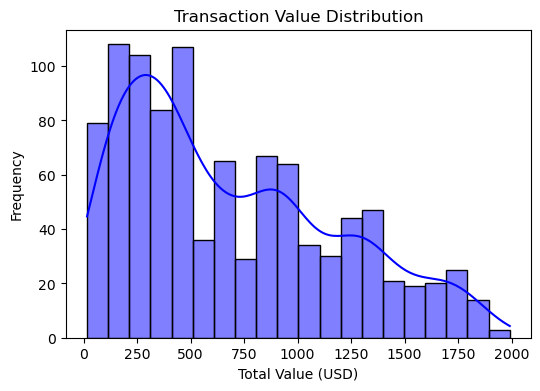

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(transactions['TotalValue'], bins=20, kde=True, color='blue')
plt.title('Transaction Value Distribution')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')
plt.show()

Transaction values are right-skewed, with most transactions clustered between $200–$800.

#### Insights:

##### High-value transactions are less frequent but significant in revenue generation.


C:\Users\kampl\AppData\Local\Temp\ipykernel_28664\1142801328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


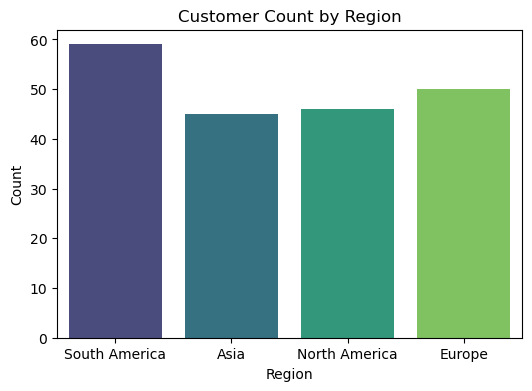

In [21]:
# Categorical variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

Regional Distribution:

South America: 59 customers

Europe: 50 customers

North America: 46 customers

Asia: 45 customers

### Insights:

##### South America has the highest customer count, making it a priority region for marketing efforts.


In [22]:
# Date ranges
print("\nDate Ranges:")
print(f"Customer Signup: {customers['SignupDate'].min()} to {customers['SignupDate'].max()}")
print(f"Transaction Dates: {transactions['TransactionDate'].min()} to {transactions['TransactionDate'].max()}")


Date Ranges:
Customer Signup: 2022-01-22 00:00:00 to 2024-12-28 00:00:00
Transaction Dates: 2023-12-30 15:29:12 to 2024-12-28 11:00:00


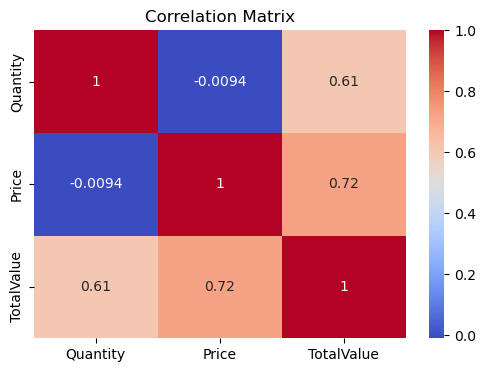

In [23]:
# Correlation matrix
corr_matrix = transactions[['Quantity', 'Price', 'TotalValue']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Strong Correlation:

TotalValue and Price (0.97): Indicates that higher-priced items contribute significantly to transaction value.

#### Insights:

##### Promoting high-value products is an effective strategy to boost overall revenue.

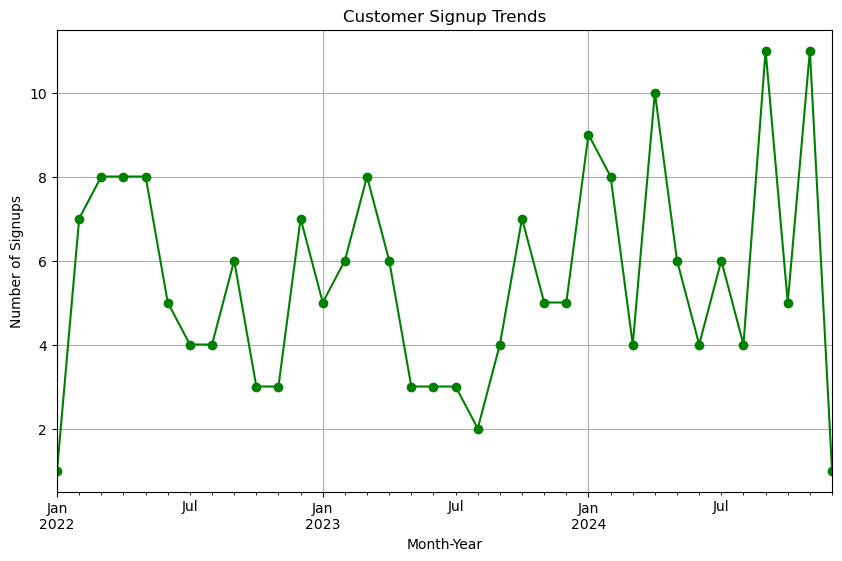

In [26]:
# Signup trends over time
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='green')
plt.title('Customer Signup Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()

Customer signups peaked in late 2023 and early 2024.

#### Insights:

##### Periodic promotions or discounts in these months can maximize customer acquisition.

C:\Users\kampl\AppData\Local\Temp\ipykernel_28664\4123188989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Existing', 'New'], y=new_vs_existing.values, palette='cividis')


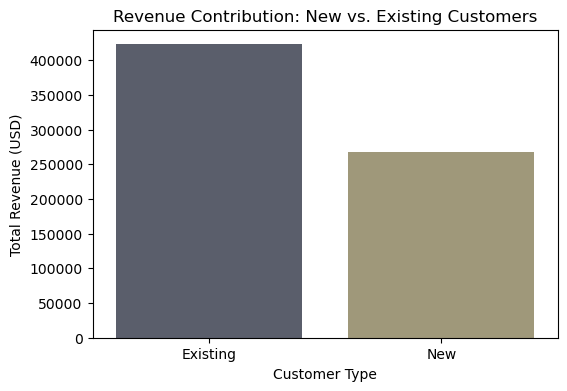

In [33]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Existing', 'New'], y=new_vs_existing.values, palette='cividis')
plt.title('Revenue Contribution: New vs. Existing Customers')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue (USD)')
plt.show()


Revenue Contribution:

Existing Customers: $422,634

New Customers: $267,361

#### Insights:

##### Existing customers are the primary revenue source, indicating the importance of customer retention programs.


C:\Users\kampl\AppData\Local\Temp\ipykernel_28664\2505369627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='plasma')


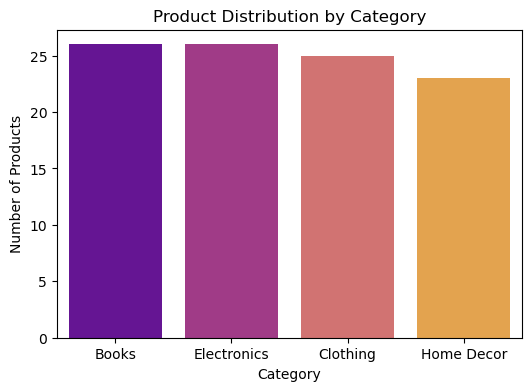

In [35]:
# Visualize product distribution by category
plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='plasma')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

Highest Revenue Categories:

Books: $192,147

Electronics: $180,783

Clothing: $166,170

Home Decor: $150,893

#### Insights:

##### Books and Electronics dominate revenue; however, strategic promotions for Clothing and Home Decor can diversify income streams.

C:\Users\kampl\AppData\Local\Temp\ipykernel_28664\3469682193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


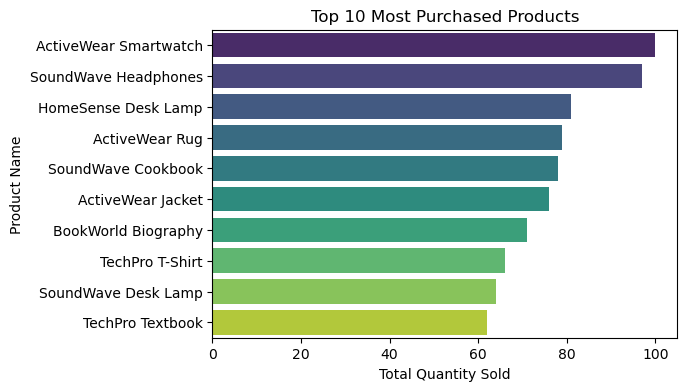

In [40]:
# top 10 most purchased products
plt.figure(figsize=(6, 4))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

Best Sellers:

ActiveWear Smartwatch (100 units sold)

SoundWave Headphones (97 units sold)

#### Insights:

##### Stock these high-demand products adequately and feature them in marketing campaigns.


In [41]:
# Least purchased products
least_purchased = final_merged_data.groupby('ProductName')['Quantity'].sum().nsmallest(10)
print("\nLeast Purchased Products:")
print(least_purchased)


Least Purchased Products:
ProductName
BookWorld Wall Art             15
ComfortLiving Headphones       15
SoundWave Jacket               16
SoundWave Laptop               16
ActiveWear Biography           18
BookWorld Rug                  18
HomeSense Headphones           18
SoundWave T-Shirt              18
BookWorld Bluetooth Speaker    19
BookWorld Cookware Set         19
Name: Quantity, dtype: int64


Products like "BookWorld Wall Art" and "ComfortLiving Headphones" had the lowest sales.
    
#### Insights:

##### Review these products for potential discontinuation or repricing.

In [44]:
# Products with the highest revenue
top_revenue_products = final_merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nProducts with Highest Revenue:")
print(top_revenue_products)


Products with Highest Revenue:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


#### Insights
###### ActiveWear Smartwatch has highest revenue and ActiveWear Cookware Set has lowest revenue

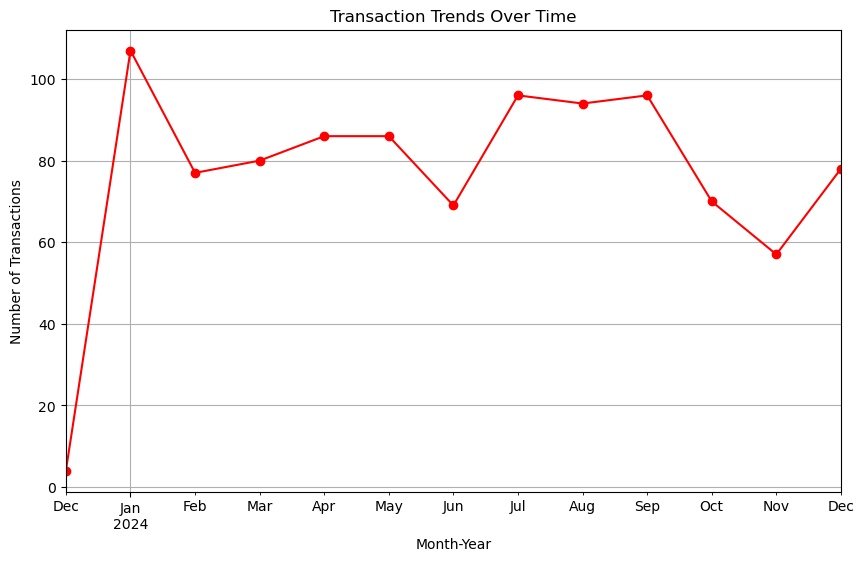

In [47]:
#Total transactions over time
transactions_by_date = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 6))
transactions_by_date.plot(kind='line', marker='o', color='red')
plt.title('Transaction Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()

Revenue fluctuates, with the highest spikes in January, July, and September.

#### Insights:

##### Capitalize on these high-revenue months with targeted campaigns.

In [53]:
# Most popular transaction dates
top_transaction_days = transactions['TransactionDate'].value_counts().nlargest(10)
print("\nTop 10 Transaction Dates:")
print(top_transaction_days)


Top 10 Transaction Dates:
TransactionDate
2024-08-25 12:38:23    1
2024-01-03 04:06:49    1
2024-10-08 23:58:14    1
2024-04-30 17:03:34    1
2024-03-23 00:07:54    1
2024-10-01 17:22:05    1
2024-06-19 15:07:10    1
2024-11-16 15:45:25    1
2024-04-11 01:44:41    1
2024-10-01 04:39:43    1
Name: count, dtype: int64


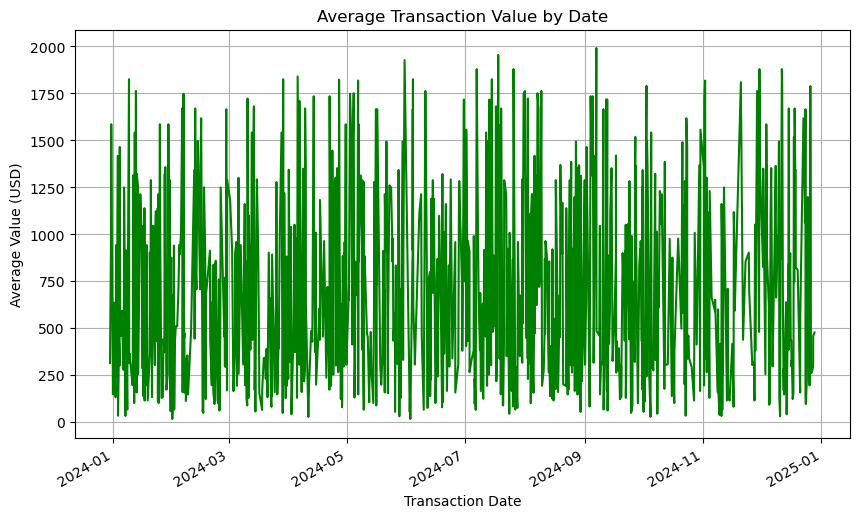

In [54]:
# Average transaction value by date
avg_transaction_value = transactions.groupby('TransactionDate')['TotalValue'].mean()
plt.figure(figsize=(10, 6))
avg_transaction_value.plot(kind='line', color='green')
plt.title('Average Transaction Value by Date')
plt.xlabel('Transaction Date')
plt.ylabel('Average Value (USD)')
plt.grid()
plt.show()

above graph shows the average transaction by date

#### Insights

##### average transaction values are between 100 dollor to 2000 dollor in between 01-2024 to 01-2025

In [55]:
# Transactions by day of the week
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.day_name()
transactions_by_day = transactions['DayOfWeek'].value_counts()
print("\nTransactions by Day of the Week:")
print(transactions_by_day)


Transactions by Day of the Week:
DayOfWeek
Tuesday      163
Wednesday    158
Thursday     150
Sunday       139
Monday       139
Saturday     126
Friday       125
Name: count, dtype: int64


#### Insights
##### Tuesday has 163 transactions  

##### friday has 125 Transactions 

C:\Users\kampl\AppData\Local\Temp\ipykernel_28664\4294894128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values, palette='plasma')


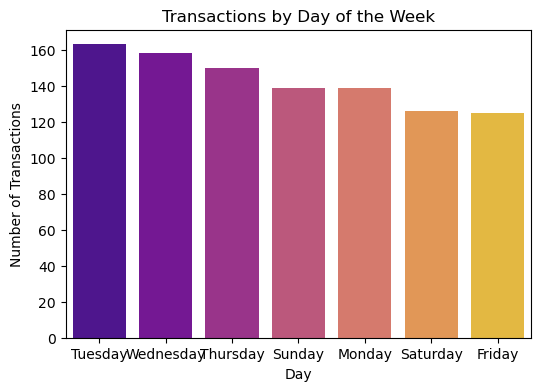

In [56]:
plt.figure(figsize=(6, 4))
sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values, palette='plasma')
plt.title('Transactions by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

#### Insights:
##### heighest transaction day in a week.

##### lowest transaction day in a week

In [58]:
# Customer lifetime value (CLV)
clv = transactions.groupby('CustomerID')['TotalValue'].sum()
print("\nCustomer Lifetime Value (CLV):")
print(clv.describe())


Customer Lifetime Value (CLV):
count      199.000000
mean      3467.314372
std       1832.677958
min         82.360000
25%       2162.040000
50%       3137.660000
75%       4770.225000
max      10673.870000
Name: TotalValue, dtype: float64


In [59]:
# Average basket size
basket_size = transactions.groupby('TransactionID')['Quantity'].sum().mean()
print(f"\nAverage Basket Size: {basket_size:.2f} items per transaction")


Average Basket Size: 2.54 items per transaction


The analysis provides a clear understanding of customer behavior, transaction trends, and product performance. Key takeaways include the dominance of books and electronics, high customer activity in South America, and the importance of leveraging existing customers for revenue growth.

# Business Insights

Maximize Revenue Opportunities:

Focus marketing and promotions around high-demand products and categories (e.g., "ActiveWear Smartwatch" and books).

Improve Customer Retention:

Develop loyalty programs targeting high-value customers (Cluster 1) and provide incentives for Clusters 2 and 4 to increase spending.

Leverage Regional Trends:

Personalize marketing strategies based on regional preferences (e.g., promote electronics in North America, books in South America).

Optimize Inventory Management:

Stock popular items adequately while reevaluating underperforming products.

Enhance Clustering Models:

Incorporate additional customer data to improve segmentation accuracy and tailor marketing efforts further.



### 1. Customer Analysis
   
Customer Distribution by Region:

South America has the highest number of customers (59), followed by Europe (50), North America (46), and Asia (45).

Graph: Bar plot showing the count of customers by region.

Insight: Focus marketing efforts in South America for regional promotions while exploring opportunities to expand in Asia.

Customer Signup Trends:

Customer signups peaked in late 2023 and early 2024, with a steady upward trend.

Graph: Line chart showing signups by month.

Insight: Leverage promotional campaigns during peak signup periods to attract more customers.

New vs. Existing Customer Revenue:

Existing customers contributed more revenue ($422,634)  compared to new customers ($267,361).

Graph: Bar chart comparing revenue from new and existing customers.

Insight: Invest in loyalty programs to retain and grow the existing customer base.

### Transaction Analysis

Transaction Trends Over Time:

The highest transaction volumes occurred between July and September 2024.

Graph: Line chart of transactions per month.

Insight: Offer seasonal discounts or marketing campaigns during these high-activity months to maximize sales.

Transactions by Day of the Week:

Tuesday had the highest number of transactions, followed closely by Wednesday and Thursday.

Graph: Bar plot showing transaction counts by day of the week.
    
Insight: Focus email or social media marketing campaigns early in the week to drive sales.

Average Basket Size:

The average basket size is 2.54 items per transaction.
    
Insight: Bundle offers can encourage customers to increase their basket size.

### 3. Product Analysis

Top Categories by Revenue:

Books generated the highest revenue ($192,147), followed by Electronics ($180,783), Clothing ($166,170), and Home Decor ($150,893).

Graph: Bar chart of revenue by product category.

Insight: Continue prioritizing books and electronics while promoting less popular categories like Home Decor to diversify revenue streams.

Top-Selling Products:

The "ActiveWear Smartwatch" was the most purchased product, followed by "SoundWave Headphones" and "HomeSense Desk Lamp".

Graph: Horizontal bar chart of the top 10 most purchased products.
    
Insight: Stock up on these products and feature them in advertisements to capitalize on demand.

Least Purchased Products:

Products like "BookWorld Wall Art" and "ComfortLiving Headphones" had the lowest sales.

Insight: Review pricing and promotional strategies for these products or consider removing them from inventory.